In [1]:
from netCDF4 import Dataset
import geopandas as gpd
import xarray as xr
import netCDF4
import os
os.chdir(r"D:\All project data")
#import xray
urls=["ds1p1981-2015-30100.nc","ds2p1981-2015-30100.nc","ds3p1981-2015-30100.nc","ds5p1981-2015-30100.nc"]
data = [xr.open_dataset(url) for url in urls]

In [2]:
data

[<xarray.Dataset>
 Dimensions:  (lat1: 117, lon1: 118)
 Coordinates:
   * lat1     (lat1) float64 8.25 8.5 8.75 9.0 9.25 ... 36.5 36.75 37.0 37.25
   * lon1     (lon1) float64 68.0 68.25 68.5 68.75 69.0 ... 96.5 96.75 97.0 97.25
 Data variables:
     rlv1     (lat1, lon1) float64 ...
     rlv301   (lat1, lon1) float64 ..., <xarray.Dataset>
 Dimensions:  (lat1: 117, lon1: 118)
 Coordinates:
   * lat1     (lat1) float64 8.25 8.5 8.75 9.0 9.25 ... 36.5 36.75 37.0 37.25
   * lon1     (lon1) float64 68.0 68.25 68.5 68.75 69.0 ... 96.5 96.75 97.0 97.25
 Data variables:
     rlv2     (lat1, lon1) float64 ...
     rlv302   (lat1, lon1) float64 ..., <xarray.Dataset>
 Dimensions:  (lat1: 117, lon1: 118)
 Coordinates:
   * lat1     (lat1) float64 8.25 8.5 8.75 9.0 9.25 ... 36.5 36.75 37.0 37.25
   * lon1     (lon1) float64 68.0 68.25 68.5 68.75 69.0 ... 96.5 96.75 97.0 97.25
 Data variables:
     rlv3     (lat1, lon1) float64 ...
     rlv303   (lat1, lon1) float64 ..., <xarray.Dataset>
 Dimension

In [2]:
rl301 = data[0]['rlv301']
rl302 = data[1]['rlv302']
rl303 = data[2]['rlv303']
rl305 = data[3]['rlv305']

In [14]:
#Latlon for gujarat
latd=[24,24.34,23.52,23.42,23.84,23.21,23.03,22.43,22.18,22.17,21.37,21.31,21.36,21.46,22.32,22.45,22.80,22.53,22.00,21.87,21.41,21.26,20.82,21.07,20.59]
lond=[70,71.76,72.10,72.37,72.99,72.63,72.40,71.43,70.56,70.07,69.49,70.36,71.15,72.11,73.00,72.45,73.55,74.19,73.16,73.55,73.01,72.99,73.70,73.40,72.93]

In [7]:
data[0]

<xarray.Dataset>
Dimensions:  (lat1: 117, lon1: 118)
Coordinates:
  * lat1     (lat1) float64 8.25 8.5 8.75 9.0 9.25 ... 36.5 36.75 37.0 37.25
  * lon1     (lon1) float64 68.0 68.25 68.5 68.75 69.0 ... 96.5 96.75 97.0 97.25
Data variables:
    rlv1     (lat1, lon1) float64 ...
    rlv301   (lat1, lon1) float64 nan nan nan nan nan ... nan nan nan nan nan

In [3]:
import numpy as np

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.path as mpltPath
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

cube1=rl301


lats=data[0].lat1.values
lons=data[0].lon1.values


[lon2d,lat2d]=np.meshgrid(lons,lats)


points=[]

for latit in range(117):
    for lonit in range(118):
        point=(lon2d[latit,lonit],lat2d[latit,lonit])
        points.append(point)

points=np.array(points)

fld1=np.squeeze(cube1.data)

mask1 =np.zeros_like(fld1)

Canada=gpd.read_file(r"C:\Users\Pranjali\Downloads\maps-master\maps-master\States\Admin2.shp")
BritishColumbia=Canada[Canada['ST_NM'] == 'Kerala']

def explode_polygon(indata):
    indf = indata
    outdf = gpd.GeoDataFrame(columns=indf.columns)
    for idx, row in indf.iterrows():
        if type(row.geometry) == Polygon:

            outdf = outdf.append(row,ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indf.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row]*recs,ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom,'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf,ignore_index=True)
    return outdf


EBritishColumbia=explode_polygon(BritishColumbia)



for index,row in EBritishColumbia.iterrows():

   
    mypolygon=[]
    for pt in list(row['geometry'].exterior.coords):
      
        mypolygon.append(pt)


    path=mpltPath.Path(mypolygon)
    inside=path.contains_points(points)

    inside=np.array(inside).reshape(lon2d.shape)
    i=np.where(inside == True)
    mask1[i]=1
i=np.where(mask1 == 0)
fld1[i]=np.nan


In [6]:
Canada

ST_NM  \
0   Andaman & Nicobar Island   
1         Arunanchal Pradesh   
2                      Assam   
3                      Bihar   
4                 Chandigarh   
5               Chhattisgarh   
6     Dadara & Nagar Havelli   
7                Daman & Diu   
8                        Goa   
9                    Gujarat   
10                   Haryana   
11          Himachal Pradesh   
12           Jammu & Kashmir   
13                 Jharkhand   
14                 Karnataka   
15                    Kerala   
16               Lakshadweep   
17            Madhya Pradesh   
18               Maharashtra   
19                   Manipur   
20                 Meghalaya   
21                   Mizoram   
22                  Nagaland   
23              NCT of Delhi   
24                Puducherry   
25                    Punjab   
26                 Rajasthan   
27                    Sikkim   
28                Tamil Nadu   
29                 Telangana   
30                   Tripura   
31             Uttar Pradesh   
32               Uttarakhand   
33               West Bengal   
34                    Odisha   
35            Andhra Pradesh   

                                             geometry  
0   (POLYGON ((93.71975948121514 7.207067636262479...  
1   POLYGON ((96.16260946675357 29.38078474502004,...  
2   (POLYGON ((89.74322932956994 26.3036203411059,...  
3   (POLYGON ((84.50719832504274 24.26323103208654...  
4   POLYGON ((76.84147287327454 30.75995934035132,...  
5   POLYGON ((83.33531747931829 24.09885072448139,...  
6   POLYGON ((73.20656615030765 20.12215606165296,...  
7   (POLYGON ((72.89334544683499 20.44538762783679...  
8   (POLYGON ((74.11917887850251 14.75344075069012...  
9   (POLYGON ((71.70375251096965 20.99958229049037...  
10  POLYGON ((76.85065405474091 30.87511930631098,...  
11  POLYGON ((76.79633817057015 33.25489599215638,...  
12  POLYGON ((74.73450654094415 37.02068299862157,...  
13  POLYGON ((87.60581887124397 25.31511789487502,...  
14  (POLYGON ((74.69694054427077 13.32782336355746...  
15  POLYGON ((74.99575065337001 12.79226798218167,...  
16  (POLYGON ((74.10130977932289 11.20431471984847...  
17  (POLYGON ((74.17931649066355 22.39058566869369...  
18  (POLYGON ((73.4627026845813 16.03710233820237,...  
19  POLYGON ((94.57602334300293 25.64221300882338,...  
20  POLYGON ((91.85632059991582 26.10352981215118,...  
21  POLYGON ((92.80022352819333 24.41629764532013,...  
22  POLYGON ((95.21458249848359 26.93094873049955,...  
23  POLYGON ((77.09361369721444 28.86939745742677,...  
24  (POLYGON ((79.7652757429812 10.99681175375946,...  
25  POLYGON ((75.88469360122878 32.48840602821571,...  
26  POLYGON ((73.8984889428105 29.9789554400416, 7...  
27  POLYGON ((88.65381086647835 28.09882815879257,...  
28  (POLYGON ((78.1918808983848 8.727295397864395,...  
29  POLYGON ((81.0561367328126 17.79096593023613, ...  
30  POLYGON ((92.22108477104541 24.50130684773291,...  
31  (POLYGON ((80.44801573343938 24.99630901644798...  
32  POLYGON ((79.2104692175804 31.34846262195248, ...  
33  (POLYGON ((88.01860800605471 21.57277899935139...  
34  (POLYGON ((86.38936784075332 19.96351229555603...  
35  (POLYGON ((81.10379790277881 17.82268849181084...

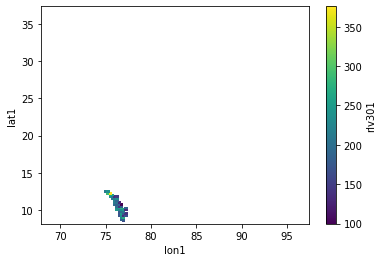

In [5]:
import matplotlib.pyplot as plt
masking1 = rl301*fld1
masking1.values = masking1.values/fld1
masking1100 = data[0]['rlv1']*fld1
masking1100.values = masking1100.values/fld1
masking1.plot() # Extracting one day return levels

In [6]:
masking2 = rl302*fld1
masking2.values = masking2.values/fld1
masking2100 = data[1]['rlv2']*fld1
masking2100.values = masking2100.values/fld1

In [7]:
masking3 = rl303*fld1
masking3.values = masking3.values/fld1
masking3100 = data[2]['rlv3']*fld1
masking3100.values = masking3100.values/fld1

In [9]:
masking5 = rl305*fld1
masking5.values = masking5.values/fld1
masking5100 = data[3]['rlv5']*fld1
masking5100.values = masking5100.values/fld1


In [18]:
m1 = masking1.values[~np.isnan(masking1.values)]
m2 = masking2.values[~np.isnan(masking2.values)]
m3 = masking3.values[~np.isnan(masking3.values)]
m5 = masking5.values[~np.isnan(masking5.values)]
m1100 = masking1100.values[~np.isnan(masking1100.values)]
m2100 = masking2100.values[~np.isnan(masking2100.values)]
m3100 = masking3100.values[~np.isnan(masking3100.values)]
m5100 = masking5100.values[~np.isnan(masking5100.values)]

In [10]:
ll=[]
for i in range(117):
    for j in range(118):
        if(np.isnan(masking1.values[i][j])== False):
            ll.append((data[0].lat1.values[i],data[0].lon1.values[j]))

In [11]:
import pandas as pd
latlon = pd.read_excel(r"D:\All project data\maharashtra districts lat lon.xlsx")

In [13]:
latlon

MH-    lat    lon  MP-   lat1   lon1  RJ-   lat2   lon2  HR-  ...   lon7  \
0   NaN  21.23  74.19  NaN  25.39  76.41  NaN  29.49  73.50  NaN  ...  75.00   
1   NaN  20.58  74.47  NaN  26.36  77.83  NaN  29.35  74.21  NaN  ...  75.62   
2   NaN  21.05  75.40  NaN  26.36  78.46  NaN  28.01  73.22  NaN  ...  76.13   
3   NaN  20.32  76.14  NaN  26.14  78.10  NaN  28.19  75.01  NaN  ...  75.78   
4   NaN  20.42  77.02  NaN  25.39  78.27  NaN  28.06  75.20  NaN  ...  76.17   
5   NaN  20.11  77.13  NaN  25.40  77.44  NaN  27.34  76.38  NaN  ...  76.54   
6   NaN  20.56  77.48  NaN  24.45  78.53  NaN  27.15  77.30  NaN  ...  76.36   
7   NaN  20.45  78.39  NaN  24.54  79.38  NaN  26.72  77.65  NaN  ...  76.15   
8   NaN  21.09  79.09  NaN  24.44  80.14  NaN  26.30  77.04  NaN  ...  77.10   
9   NaN  21.09  79.42  NaN  23.50  78.50  NaN  25.58  76.30  NaN  ...  76.34   
10  NaN  21.28  80.29  NaN  23.50  79.29  NaN  26.89  76.33  NaN  ...  76.49   
11  NaN  19.49  80.27  NaN  24.34  80.55  NaN  26.55  75.52  NaN  ...  76.26   
12  NaN  19.57  79.21  NaN  24.76  81.60  NaN  27.36  75.15  NaN  ...  76.87   
13  NaN  20.25  78.11  NaN  23.30  80.53  NaN  27.00  73.40  NaN  ...  76.59   
14  NaN  19.09  77.27  NaN  24.27  74.52  NaN  26.18  73.04  NaN  ...    NaN   
15  NaN  19.43  77.11  NaN  24.03  75.08  NaN  26.55  70.57  NaN  ...    NaN   
16  NaN  19.08  76.50  NaN  23.31  75.07  NaN  25.45  71.25  NaN  ...    NaN   
17  NaN  19.51  75.56  NaN  23.09  75.43  NaN  25.22  72.58  NaN  ...    NaN   
18  NaN  19.53  75.23  NaN  23.26  76.18  NaN  24.88  72.85  NaN  ...    NaN   
19  NaN  20.02  73.50  NaN  22.58  78.06  NaN  25.46  73.25  NaN  ...    NaN   
20  NaN  19.12  73.02  NaN  22.35  75.20  NaN  26.27  74.42  NaN  ...    NaN   
21  NaN  18.51  73.18  NaN  22.44  75.50  NaN  26.11  75.50  NaN  ...    NaN   
22  NaN  18.31  73.55  NaN  21.90  75.80  NaN  25.27  75.41  NaN  ...    NaN   
23  NaN  19.05  74.48  NaN  21.83  75.06  NaN  25.21  74.40  NaN  ...    NaN   
24  NaN  19.00  75.50  NaN  24.00  76.47  NaN  25.07  73.88  NaN  ...    NaN   
25  NaN  18.24  76.36  NaN  23.32  77.51  NaN  23.50  73.50  NaN  ...    NaN   
26  NaN  18.08  76.06  NaN  23.16  77.36  NaN  23.30  74.24  NaN  ...    NaN   
27  NaN  17.65  75.90  NaN  23.12  77.00  NaN  24.54  74.42  NaN  ...    NaN   
28  NaN  17.42  74.02  NaN  23.15  77.50  NaN  25.10  75.52  NaN  ...    NaN   
29  NaN  17.08  73.19  NaN  21.88  77.98  NaN  25.05  76.33  NaN  ...    NaN   
..  ...    ...    ...  ...    ...    ...  ...    ...    ...  ...  ...    ...   
40  NaN    NaN    NaN  NaN  24.40  77.20  NaN    NaN    NaN  NaN  ...    NaN   
41  NaN    NaN    NaN  NaN  24.57  77.73  NaN    NaN    NaN  NaN  ...    NaN   
42  NaN    NaN    NaN  NaN  23.00  81.30  NaN    NaN    NaN  NaN  ...    NaN   
43  NaN    NaN    NaN  NaN  23.07  81.77  NaN    NaN    NaN  NaN  ...    NaN   
44  NaN    NaN    NaN  NaN  24.20  82.39  NaN    NaN    NaN  NaN  ...    NaN   
45  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
46  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
47  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
48  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
49  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
50  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
51  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
52  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
53  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
54  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
55  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
56  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
57  NaN    NaN    NaN  NaN    NaN    NaN  NaN    NaN    NaN  NaN  ...    NaN   
58  

In [15]:
len(ll)

50

In [12]:
p01=[]
for i in range(14):
    for j in range(len(ll)):
        p= (1/(np.sqrt((latlon['lat7'][i]-ll[j][0])**2+(latlon['lon7'][i]-ll[j][1])**2)))#*m0[j]
        p01.append(p) # Inverse weight calculation for each district

In [13]:
len(p01)

700

In [14]:
for i in range(len(p01)):
    if(p01[i]==np.inf):
        print(i)

In [16]:
#p01[4169]=0
sp301=0
pf=[]

for i in range(0,700,50):
    for j in range(50):
        sp301= sp301+p01[i:i+50][j]
    pf.append(sp301)

In [19]:
s1=0
s2=0
s3=0
s4=0
s5=0
s6=0
s7=0
s8=0
s30=[]
s100=[]
for i in range(0,700,50):
    for j in range(50):
            s1=s1+(p01[i:i+50][j]*m1[j])
            s2=s2+(p01[i:i+50][j]*m2[j])
            s3=s3+(p01[i:i+50][j]*m3[j])
            s4=s4+(p01[i:i+50][j]*m5[j])
            s5=s5+(p01[i:i+50][j]*m1100[j])
            s6=s6+(p01[i:i+50][j]*m2100[j])
            s7=s7+(p01[i:i+50][j]*m3100[j])
            s8=s8+(p01[i:i+50][j]*m5100[j])
    s30.append((s1,s2,s3,s4))
    s100.append((s5,s6,s7,s8))

In [20]:
rlf30=[]
for i in range(len(s30)):
    rlf30.append((s30[i][0]/pf[i],s30[i][1]/pf[i],s30[i][2]/pf[i],s30[i][3]/pf[i]))

In [21]:
rlf100=[]
for i in range(len(s100)):
    rlf100.append((s100[i][0]/pf[i],s100[i][1]/pf[i],s100[i][2]/pf[i],s100[i][3]/pf[i]))

In [22]:
rlf30

[(227.68252781950753, 346.1928578366086, 445.09708416675, 590.941817573717),
 (229.10791505333634,
  344.54951529550215,
  440.2767795654033,
  582.8310317996732),
 (217.30421848038847, 324.6265266534326, 412.5692162566055, 541.612631062356),
 (215.2830701408284, 320.20808265788526, 406.8065119125091, 534.6530903923672),
 (212.00421413882628,
  313.19002016314874,
  395.9574264798503,
  518.6689754093579),
 (206.39467220567346,
  303.90882186643995,
  382.53580383168224,
  499.85497071324164),
 (205.66195942001903, 302.303783052774, 379.08796064496283, 494.3210197791635),
 (206.32530579973962, 302.3408446971486, 378.1531979979465, 492.5454754296395),
 (205.7444984368704,
  302.11024523767975,
  377.6324108462704,
  491.34503136282177),
 (205.24078652777484,
  301.010138264733,
  375.96527487318457,
  488.91497810855697),
 (203.06458582741953,
  297.4574679985071,
  371.53397121329334,
  483.8063722343969),
 (202.9240067983442, 297.0203661873434, 370.76736411901305, 482.5299607718398),


In [23]:
rlratio1 = []
rlratio2 = []
rlratio3 = []
rlratio5 = []
for i in range(len(s100)):
    rlratio1.append(rlf100[i][0]/rlf30[i][0])
    rlratio2.append(rlf100[i][1]/rlf30[i][1])
    rlratio3.append(rlf100[i][2]/rlf30[i][2])
    rlratio5.append(rlf100[i][3]/rlf30[i][3])

In [24]:
import pandas as pd
df2= pd.DataFrame({'r1r':rlratio1,'r2r':rlratio2,'r3r':rlratio3,'r5r':rlratio5})

In [99]:
import openpyxl
df2.to_excel( r"D:\models-rlratio.xlsx")

In [25]:
rl1ind =[]
rl2ind=[]
rl3ind=[]
rl5ind=[]
for i in range(len(rlratio1)):
    rl1ind.append((rlratio1[i]-min(rlratio1))/(max(rlratio1)-min(rlratio1)))
    rl2ind.append((rlratio2[i]-min(rlratio2))/(max(rlratio2)-min(rlratio2)))
    rl3ind.append((rlratio3[i]-min(rlratio3))/(max(rlratio3)-min(rlratio3)))
    rl5ind.append((rlratio5[i]-min(rlratio5))/(max(rlratio5)-min(rlratio5)))

In [26]:
import pandas as pd
df1= pd.DataFrame({'rl100':rlf100,'r30':rlf30,'r1index':rl1ind,'r2index':rl2ind,'r3index':rl3ind,'r5index':rl5ind})

In [27]:
df1

rl100  \
0   (275.5423645570891, 402.1441980956198, 508.906...   
1   (283.9305699994725, 406.4632836175223, 510.407...   
2   (271.5642000985719, 388.08130979941586, 483.93...   
3   (268.93574469094114, 381.12533356775253, 475.3...   
4   (265.0974776956246, 373.38333107921324, 463.10...   
5   (257.8204475355058, 362.6196868461466, 447.334...   
6   (257.3315300323818, 361.85240620572137, 444.05...   
7   (258.49873055997114, 362.4126532040467, 443.23...   
8   (258.40309101497127, 363.7482520580504, 444.90...   
9   (257.62868831758425, 362.4157680552615, 443.00...   
10  (254.0035559384318, 357.1199494670827, 436.542...   
11  (253.8337222700378, 356.71430819153073, 435.82...   
12  (254.70131785356622, 357.1032866967694, 435.34...   
13  (254.5958937592016, 356.84579128762437, 434.84...   

                                                  r30   r1index   r2index  \
0   (227.68252781950753, 346.1928578366086, 445.09...  0.000000  0.000000   
1   (229.10791505333634, 344.54951529550215, 440.2...  0.635874  0.421396   
2   (217.30421848038847, 324.6265266534326, 412.56...  0.863444  0.789161   
3   (215.2830701408284, 320.20808265788526, 406.80...  0.853020  0.667296   
4   (212.00421413882628, 313.19002016314874, 395.9...  0.879601  0.712791   
5   (206.39467220567346, 303.90882186643995, 382.5...  0.851777  0.735907   
6   (205.66195942001903, 302.303783052774, 379.087...  0.897103  0.824424   
7   (206.32530579973962, 302.3408446971486, 378.15...  0.932835  0.864202   
8   (205.7444984368704, 302.11024523767975, 377.63...  1.000000  0.988595   
9   (205.24078652777484, 301.010138264733, 375.965...  0.984898  0.987981   
10  (203.06458582741953, 297.4574679985071, 371.53...  0.888699  0.908165   
11  (202.9240067983442, 297.0203661873434, 370.767...  0.889347  0.917516   
12  (203.19160912671416, 296.60956796545565, 369.3...  0.946684  0.986865   
13  (203.05878392636507, 296.25704980276606, 368.7...  0.953260  1.000000   

     r3index   r5index  
0   0.000000  0.000000  
1   0.444969  0.383842  
2   0.827404  0.621278  
3   0.704581  0.580272  
4   0.732746  0.606254  
5   0.727262  0.607832  
6   0.782744  0.667303  
7   0.802922  0.700118  
8   0.971416  0.872843  
9   0.976164  0.899714  
10  0.883174  0.913958  
11  0.897283  0.931742  
12  0.983148  0.989246  
13  1.000000  1.000000

In [28]:
import openpyxl
df1.to_excel( r"D:\All project data\2011-rlindex(100to30)-KL.xlsx")